Import the necessary libraries.

In [1]:
import csv
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sentence_transformers import SentenceTransformer
from create_input_lists import create_input_lists_from_csv, lemmatize
from statistics import mean
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from statistics import mean, median, mode
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Define the example vectors.

In [2]:
vectors = [[0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,0,1],
           [0,0,0,1,0],
           [0,0,0,1,0],
           [0,0,0,1,0],
           [0,0,0,1,0],
           [0,0,1,0,0],
           [0,0,1,0,0],
           [0,0,1,0,0],
           [0,0,1,0,0],
           [0,0,1,1,0],
           [0,0,1,1,0],
           [0,1,0,0,0],
           [0,1,0,0,0],
           [0,1,0,0,0],
           [0,1,0,0,0],
           [0,1,0,1,0],
           [0,1,0,1,0],
           [1,0,0,0,0],
           [1,0,0,0,0],
           [1,0,0,0,0],
           [1,0,0,0,0],
           [1,0,0,1,0],
           [1,0,0,1,0],
           [1,1,0,0,0],
           [1,1,0,0,0],
           [1,1,0,0,0],
           [1,1,0,0,0],
           [1,1,0,1,0],
           [1,1,0,1,0]]

for index in range(0, len(vectors)):
    vectors[index] = vectors[index] / norm(vectors[index])

In [3]:
print(np.array(vectors).shape)

(38, 5)


In [4]:
nonzero_counts = []
for vector in vectors:
    nonzero_counts.append(np.count_nonzero(vector))

Output Summary Statistics of Vectorizations:

In [5]:
print('Summary of Example Vectors:\n')
print('Average Number of Non-Zeros:', mean(nonzero_counts))
print('Total # of Dimensions:', np.array(vectors).shape[1])

Summary of Example Vectors:

Average Number of Non-Zeros: 1.368421052631579
Total # of Dimensions: 5


In [6]:
def plot_distances(distances_list):
    plt.hist(distances_list, rwidth = 0.8, bins=np.arange(min(distances_list), max(distances_list) + 0.01, 0.01))
    plt.xlabel('Pairwise Distance',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(min(distances_list), max(distances_list)+0.1, 0.1))
    plt.grid()
    plt.show()
    
def plot_similarities(cos_sim_list):
    plt.hist(cos_sim_list, rwidth = 0.8, bins=np.arange(min(cos_sim_list), max(cos_sim_list) + 0.01, 0.01))
    plt.xlabel('Pairwise Cosine Similarity',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(min(cos_sim_list), max(cos_sim_list)+0.1, 0.1))
    plt.grid()
    plt.show()
    
def calculate_pairwise_metrics(pairs):    
    cos_sim_list = []
    dist_list = []
    orthogonal_count = 0
    for pair in pairs:
        a,b = pair
        a = np.array(a)
        b = np.array(b)
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        cos_sim_list.append(cos_sim)

        if cos_sim == 0:
            orthogonal_count += 1

        dist = norm(a - b)
        dist_list.append(dist)
    
    return(cos_sim_list, orthogonal_count, dist_list)

def print_similarity_statistics(sim_list):
    print('Cosine Similarity Mean:', mean(sim_list))
    print('Cosine Similarity Median:', median(sim_list))
    print('Cosine Similarity Mode:', mode(sim_list))
    print('Cosine Similarity Min:', min(sim_list))
    print('Cosine Similarity Max:', max(sim_list))
    
def print_distance_statistics(dist_list):
    print('Euclidean Distance Mean:', mean(dist_list))
    print('Euclidean Distance Median:', median(dist_list))
    print('Euclidean Distance Mode:', mode(dist_list))
    print('Euclidean Distance Min:', min(dist_list))
    print('Euclidean Distance Max:', max(dist_list))

Cosine Similarity Mean: 0.2533739507996784
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 703
Number of Orthogonal Pairs: 472


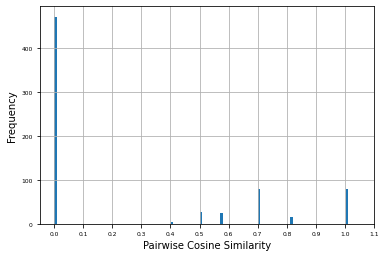

Euclidean Distance Mean: 1.1278070030197205
Euclidean Distance Median: 1.4142135623730951
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730951


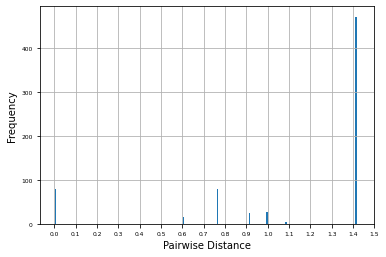

In [7]:
pairs = [[a, b] for idx, a in enumerate(vectors) for b in vectors[idx + 1:]]

sim_list, count, dist_list = calculate_pairwise_metrics(pairs)
print_similarity_statistics(sim_list)
print('\nNumber of Pairs:', len(pairs))
print('Number of Orthogonal Pairs:', count)
plot_similarities(sim_list)

print_distance_statistics(dist_list)
plot_distances(dist_list)

In [11]:
km = KMeans(n_clusters = 3, max_iter = 50000, init = 'k-means++')
cluster_assignment = km.fit(vectors).labels_

for index in range(0, len(vectors)):
    print(vectors[index], cluster_assignment[index])

[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 0. 1.] 1
[0. 0. 0. 1. 0.] 2
[0. 0. 0. 1. 0.] 2
[0. 0. 0. 1. 0.] 2
[0. 0. 0. 1. 0.] 2
[0. 0. 1. 0. 0.] 2
[0. 0. 1. 0. 0.] 2
[0. 0. 1. 0. 0.] 2
[0. 0. 1. 0. 0.] 2
[0.         0.         0.70710678 0.70710678 0.        ] 2
[0.         0.         0.70710678 0.70710678 0.        ] 2
[0. 1. 0. 0. 0.] 0
[0. 1. 0. 0. 0.] 0
[0. 1. 0. 0. 0.] 0
[0. 1. 0. 0. 0.] 0
[0.         0.70710678 0.         0.70710678 0.        ] 2
[0.         0.70710678 0.         0.70710678 0.        ] 2
[1. 0. 0. 0. 0.] 0
[1. 0. 0. 0. 0.] 0
[1. 0. 0. 0. 0.] 0
[1. 0. 0. 0. 0.] 0
[0.70710678 0.         0.         0.70710678 0.        ] 0
[0.70710678 0.         0.         0.70710678 0.        ] 0
[0.70710678 0.70710678 0.         0.         0.        ] 0
[0.70710678 0.70710678 0.         0.         0.        ] 0
[0.70710678 0.70710678 0.         